# Exploratory Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [3]:
data = pd.read_csv("daily_data.csv")

In [4]:
data.head()

,date,daily_avg_benzene,datetime
0,2004-03-10,8.460790,2004-03-10T00:00:00Z
1,2004-03-11,7.989058,2004-03-11T00:00:00Z
2,2004-03-12,12.129509,2004-03-12T00:00:00Z
3,2004-03-13,10.922887,2004-03-13T00:00:00Z
4,2004-03-14,9.631442,2004-03-14T00:00:00Z


In [5]:
df = data.drop("datetime", axis='columns')

In [6]:
df.head()

,date,daily_avg_benzene
0,2004-03-10,8.460790
1,2004-03-11,7.989058
2,2004-03-12,12.129509
3,2004-03-13,10.922887
4,2004-03-14,9.631442


In [7]:
# Statistics
df.describe()

,daily_avg_benzene
count,391.000000
mean,10.173870
std,4.308602
min,1.431244
25%,6.921344
50%,9.984321
75%,13.112391
max,24.395876


In [8]:
# Missing Values
df.isnull().sum()

date                 0
daily_avg_benzene    0
dtype: int64

In [9]:
# Data Types
df.dtypes

date                  object
daily_avg_benzene    float64
dtype: object

In [10]:
# Length of Dataset
len(df)

391

# Pre-Processing

In [11]:
df['date'] = pd.to_datetime(df['date'])

## Exploratory Data Analysis

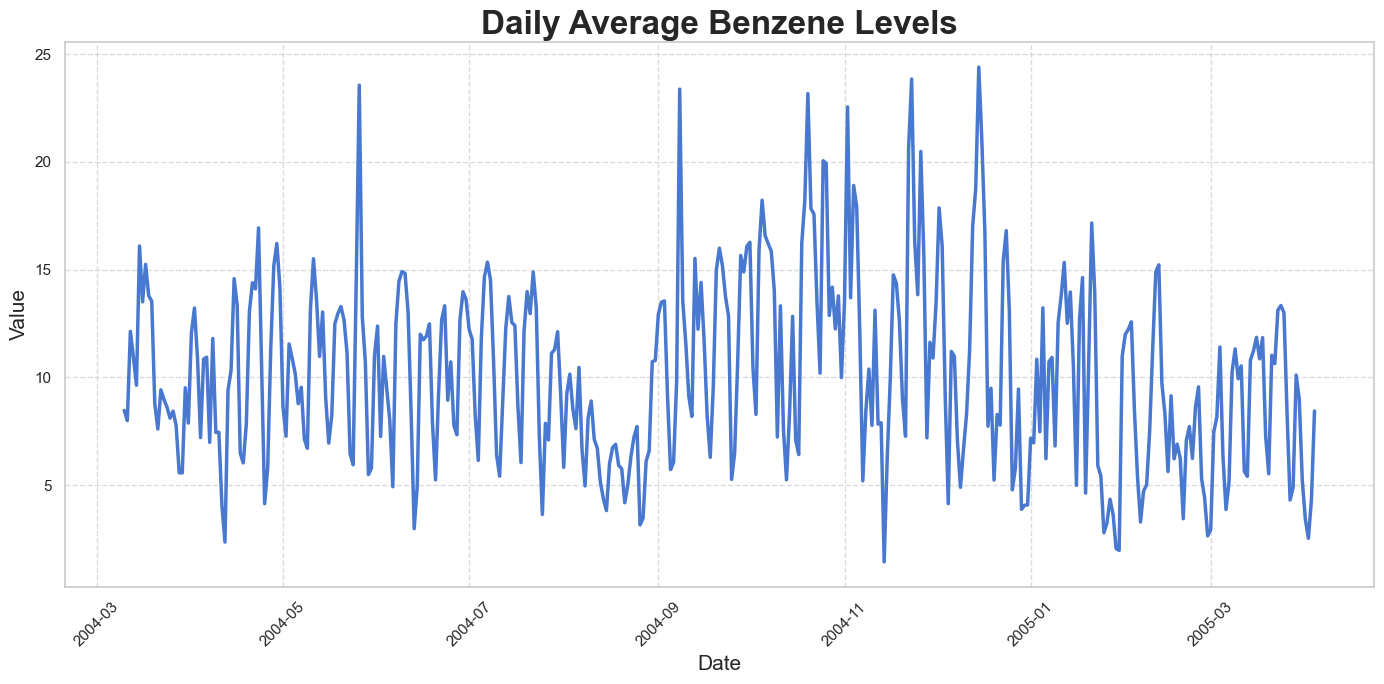

In [12]:
# Time Series Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='daily_avg_benzene', data=df, linewidth=2.5)

plt.title('Daily Average Benzene Levels', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

## Statistical Analysis

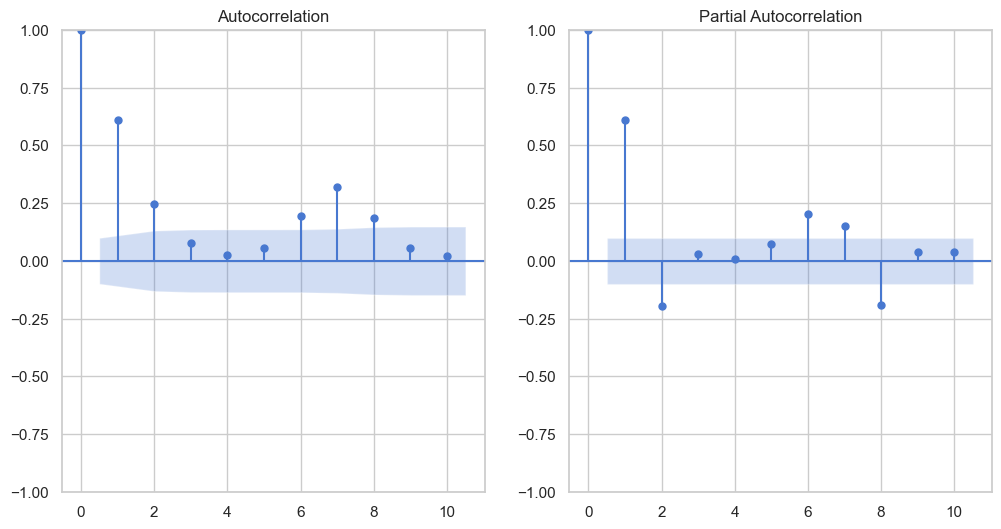

In [13]:
# ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['daily_avg_benzene'], lags=10, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['daily_avg_benzene'], lags=10, ax=plt.gca())
plt.show()

In [14]:
# ADF Test
adf_result = adfuller(df['daily_avg_benzene'].dropna())

print('ADF Statistic:', adf_result[0].round(4))
print('p-value:', adf_result[1].round(4))
print("Number of Observations Used: {}".format(adf_result[3]))
print("Critical Values:")
for key, value in adf_result[4].items():
    print("  {}: {:.4f}".format(key, value))

ADF Statistic: -4.0217
p-value: 0.0013
Number of Observations Used: 375
Critical Values:
  1%: -3.4479
  5%: -2.8693
  10%: -2.5709


In [15]:
# KPSS Test
kpss_result = kpss(df['daily_avg_benzene'].dropna(), regression='c')

print('KPSS Statistic:', kpss_result[0].round(4))
print('p-value:', kpss_result[1].round(4))
print("Critical Values:")
for key, value in kpss_result[3].items():
    print("  {}: {:.4f}".format(key, value))

KPSS Statistic: 0.357
p-value: 0.0957
Critical Values:
  10%: 0.3470
  5%: 0.4630
  2.5%: 0.5740
  1%: 0.7390


## Moving Average

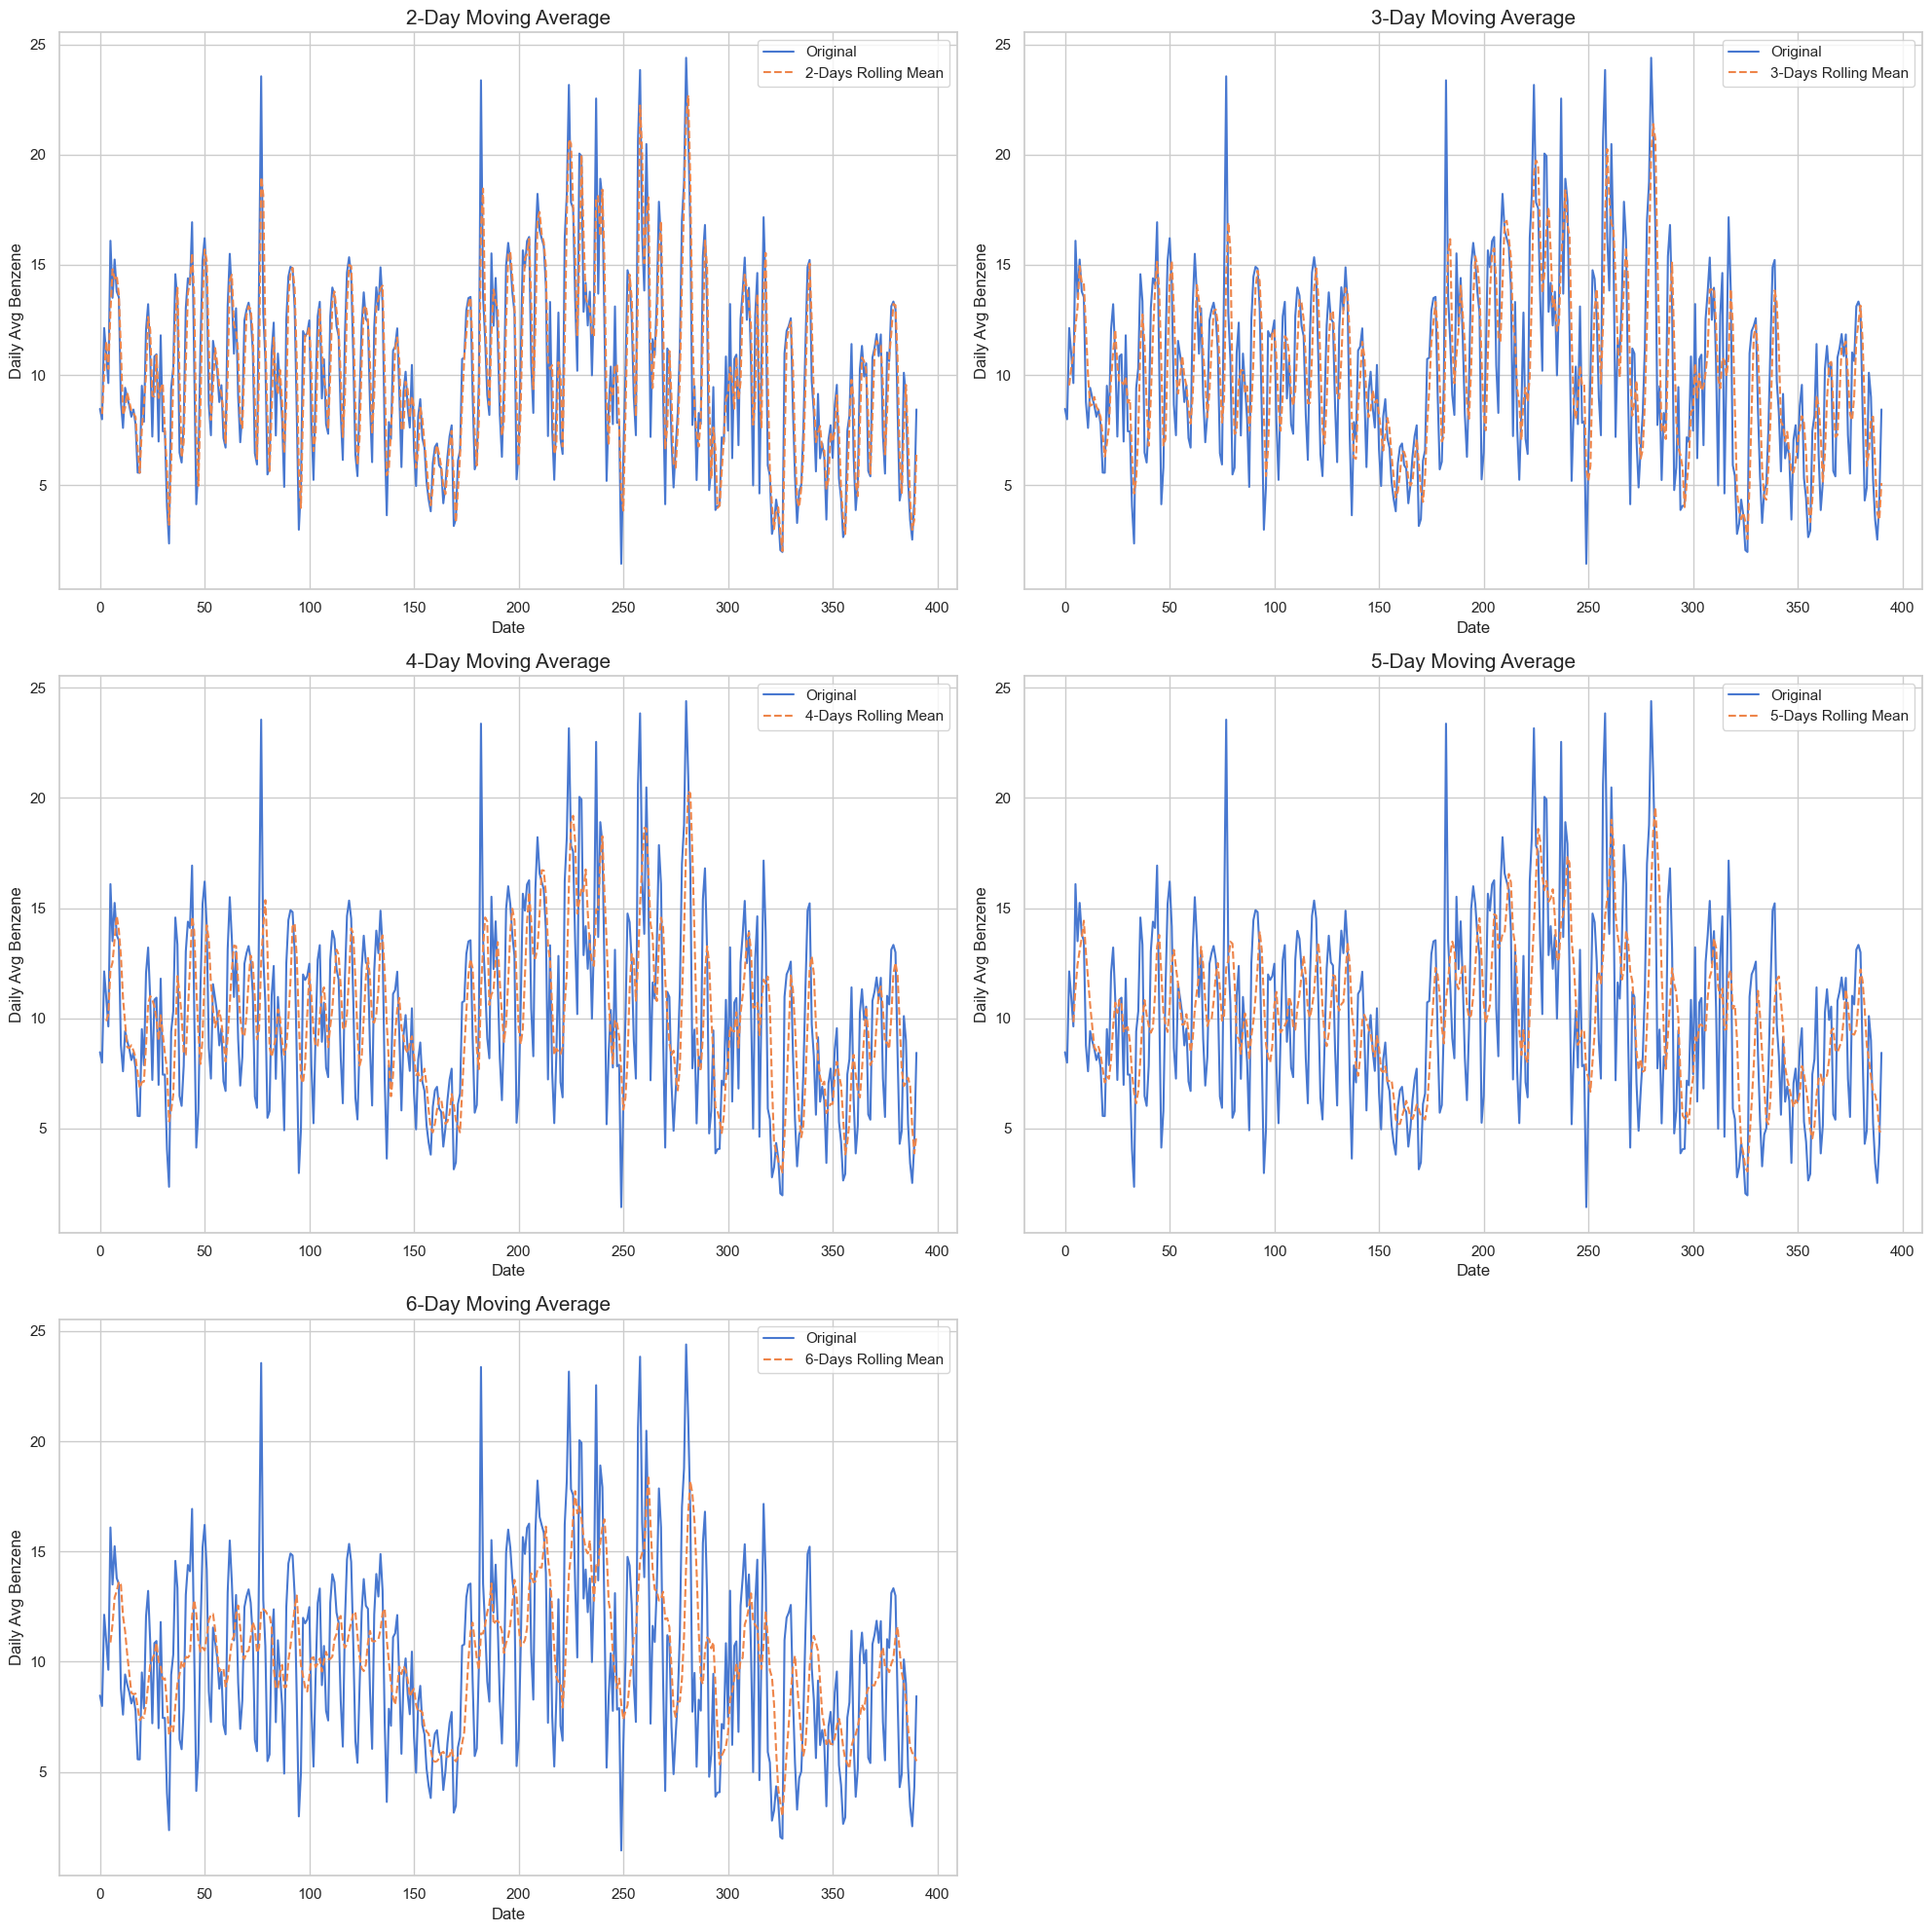

In [16]:
plt.figure(figsize=(20, 20))

for i, window in enumerate([2, 3, 4, 5, 6]):
    moving_average = df['daily_avg_benzene'].rolling(window=window).mean()
    
    plt.subplot(3, 2, i + 1)
    plt.plot(df.index, df['daily_avg_benzene'], label='Original', linestyle='-')
    plt.plot(df.index, moving_average, label='{}-Days Rolling Mean'.format(window), linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Daily Avg Benzene")
    plt.title("{}-Day Moving Average".format(window), fontsize=15)
    plt.grid(True) 
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Rolling Statistics

In [17]:
rolling_mean = df['daily_avg_benzene'].rolling(window=5).mean()
rolling_std = df['daily_avg_benzene'].rolling(window=5).std()

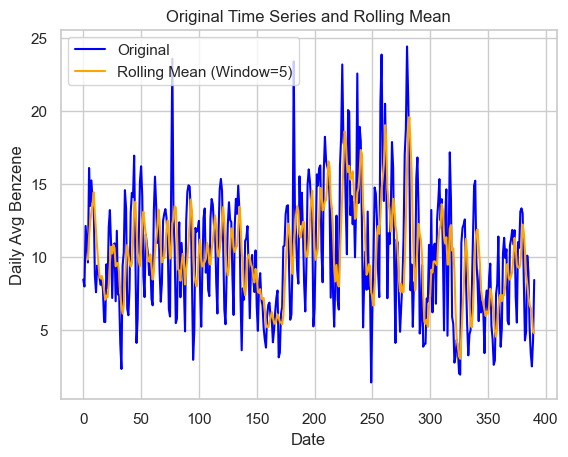

In [18]:
# Original Time Series and Rolling Mean
plt.plot(df.index, df['daily_avg_benzene'], label='Original', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean (Window=5)', color='orange')
plt.title('Original Time Series and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Daily Avg Benzene')
plt.legend(loc='best')
plt.grid(True)
plt.show()

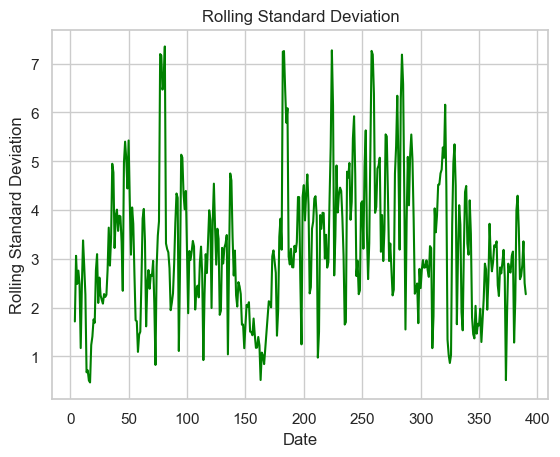

In [19]:
# Rolling Standard Deviation
plt.plot(df.index, rolling_std, label='Rolling Std Dev (Window=5)', color='green')
plt.title('Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.show()

## Decomposition

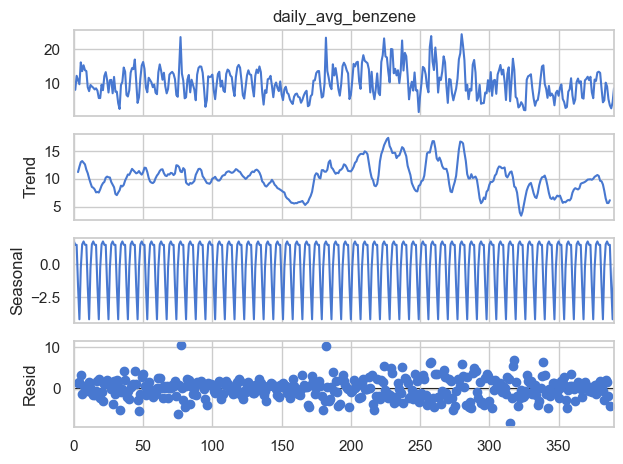

In [20]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['daily_avg_benzene'], model='additive', period=7)
additive_decomposition.plot()
plt.show()

### Residuals of Decomposition

In [21]:
residuals = additive_decomposition.resid 

In [22]:
# Dickey-Fuller Test
adf_test = adfuller(residuals.dropna(), autolag='AIC')

print("ADF Statistic: {:.4f}".format(adf_test[0]))
print("p-value: {:.4f}".format(adf_test[1]))
print("Number of Lags Used: {}".format(adf_test[2]))
print("Number of Observations Used: {}".format(adf_test[3]))
print("Critical Values:")
for key, value in adf_test[4].items():
    print("  {}: {:.4f}".format(key, value))

ADF Statistic: -8.5327
p-value: 0.0000
Number of Lags Used: 17
Number of Observations Used: 367
Critical Values:
  1%: -3.4483
  5%: -2.8694
  10%: -2.5710


In [23]:
# KPPS Test
kpss_test = kpss(residuals.dropna(), nlags='auto') 

print("KPSS Statistic: {:.4f}".format(kpss_test[0]))
print("p-value: {:.4f}".format(kpss_test[1]))
print("Lags Used: {}".format(kpss_test[2]))
print("Critical Values:")
for key, value in kpss_test[3].items():
    print("  {}: {:.4f}".format(key, value))

KPSS Statistic: 0.3624
p-value: 0.0934
Lags Used: 209
Critical Values:
  10%: 0.3470
  5%: 0.4630
  2.5%: 0.5740
  1%: 0.7390
